In [ ]:
#v 1.0 -without epsilon greedy 
#v 1.1 with epsilon greedy 
#v 1.2 with exact hyperparam as deepmind model | changed epsilon update frequncy 
#v 1.2 old v1.2 + clipnorm =1  
#v 1.3 reduced frame buffer 

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")


Mounted at /content/gdrive


In [ ]:
cd '/content/gdrive/MyDrive/rl'

/content/gdrive/MyDrive/rl


In [ ]:
ls

attempt2withlessbuffer/  loss_q_hist5000.txt      reward_history2500.txt
loss_q_hist0.txt         loss_q_hist7500.txt      reward_history5000.txt
loss_q_hist10000.txt     reward_history0.txt      reward_history7500.txt
loss_q_hist2500.txt      reward_history10000.txt


In [ ]:
cd v_1_3/

/content/gdrive/MyDrive/rl/v_1_3


In [ ]:
import numpy as np
import pickle

# REQ

In [ ]:
import gym
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from google.colab import output
import matplotlib.pyplot as plt

In [ ]:
env = gym.make('CartPole-v1')

In [ ]:
env.reset()
observation, reward, done, info = env.step(env.action_space.sample())

In [ ]:
observation

array([ 0.0105977 ,  0.16616303,  0.04024601, -0.2995223 ])

In [ ]:
reward

1.0

In [ ]:
done

False

In [ ]:
info

{}

In [ ]:
env.action_space

Discrete(2)

In [ ]:
num_actions=2; #output of neural network 
state_shape=4; #input of neural network 

# NN

In [ ]:
def create_q_model():
    
    inputs = layers.Input(shape=(4,))
    layer1 = layers.Dense(128, activation="relu")(inputs)
    layer2 = layers.Dense(128, activation="relu")(layer1)
    action = layers.Dense(num_actions, activation="linear")(layer2)
    return keras.Model(inputs=inputs, outputs=action)

In [ ]:
online_model=create_q_model()
target_model=create_q_model()

# Hyper param

In [ ]:
#hyperparams from Deep mind DQN paper
mini_batch_size=32 
#Number of training cases over which SGD update is computeted 
max_reply_buffer_size=50000
min_reply_buffer_size=10000#minimum number of samples in reply buffer before start training 
lr= 0.00025#learning rate
target_network_update_freqency = 10000#how often target network is updated 
discount_factor=0.99#
update_after_actions = 4

In [ ]:
loss_function = keras.losses.Huber()
optimizer = keras.optimizers.Adam(learning_rate=lr,clipnorm=1.0)

In [ ]:
#replay buffer 
actions_buffer=[]
state_buffer=[]
next_state_buffer=[]
done_buffer=[]
reward_buffer=[]

In [ ]:
min_epsilon=0.1
max_epsilon=1


# Train

In [ ]:
#Fill replay buffer to min 
state=env.reset()
#rwd=[]
#max_reward=0
for i in range (0,min_reply_buffer_size ):
  action=env.action_space.sample()
  next_state, reward, done, info = env.step(action)

  state_buffer.append(state)
  next_state_buffer.append(next_state)
  done_buffer.append(done)
  reward_buffer.append(reward)
  actions_buffer.append(action)
  state=next_state
  #max_reward=max_reward+reward
  #print(state)
  if done:
    #print("done")
    state=env.reset()
    #rwd.append(max_reward)
    #max_reward=0
    

## Check buffer

In [ ]:
#rwd

In [ ]:
next_state_buffer

[array([ 0.01166704,  0.15023903,  0.03914866, -0.32221777]),
 array([ 0.01467182, -0.0454179 ,  0.03270431, -0.01745048]),
 array([ 0.01376347,  0.14922014,  0.0323553 , -0.29963807]),
 array([ 0.01674787,  0.34386632,  0.02636254, -0.58194373]),
 array([ 0.0236252 ,  0.14838512,  0.01472366, -0.28107412]),
 array([ 0.0265929 ,  0.34329398,  0.00910218, -0.56907713]),
 array([ 0.03345878,  0.14804556, -0.00227936, -0.27354062]),
 array([ 0.03641969,  0.34319996, -0.00775018, -0.56694159]),
 array([ 0.04328369,  0.14818758, -0.01908901, -0.27671034]),
 array([ 0.04624744, -0.04665691, -0.02462321,  0.00989132]),
 array([ 0.0453143 ,  0.14880936, -0.02442539, -0.2904577 ]),
 array([ 0.04829049,  0.34427093, -0.03023454, -0.59074295]),
 array([ 0.05517591,  0.53980286, -0.0420494 , -0.89279439]),
 array([ 0.06597196,  0.73546916, -0.05990529, -1.19839329]),
 array([ 0.08068135,  0.93131294, -0.08387315, -1.50923363]),
 array([ 0.09930761,  0.73730168, -0.11405783, -1.24386956]),
 array([

In [ ]:
state_buffer

[array([ 0.01255279, -0.04428723,  0.03999702, -0.04241774]),
 array([ 0.01166704,  0.15023903,  0.03914866, -0.32221777]),
 array([ 0.01467182, -0.0454179 ,  0.03270431, -0.01745048]),
 array([ 0.01376347,  0.14922014,  0.0323553 , -0.29963807]),
 array([ 0.01674787,  0.34386632,  0.02636254, -0.58194373]),
 array([ 0.0236252 ,  0.14838512,  0.01472366, -0.28107412]),
 array([ 0.0265929 ,  0.34329398,  0.00910218, -0.56907713]),
 array([ 0.03345878,  0.14804556, -0.00227936, -0.27354062]),
 array([ 0.03641969,  0.34319996, -0.00775018, -0.56694159]),
 array([ 0.04328369,  0.14818758, -0.01908901, -0.27671034]),
 array([ 0.04624744, -0.04665691, -0.02462321,  0.00989132]),
 array([ 0.0453143 ,  0.14880936, -0.02442539, -0.2904577 ]),
 array([ 0.04829049,  0.34427093, -0.03023454, -0.59074295]),
 array([ 0.05517591,  0.53980286, -0.0420494 , -0.89279439]),
 array([ 0.06597196,  0.73546916, -0.05990529, -1.19839329]),
 array([ 0.08068135,  0.93131294, -0.08387315, -1.50923363]),
 array([

In [ ]:
done_buffer

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,

In [ ]:
#reward_buffer

## Training loop 

In [ ]:
#choose best action argmax q value of net 
#record to the buffer remove the extra elements 
#take 4 action then update online net 
#after n number of action update target net 


In [ ]:
#number of iterations 
num_iteration=1000000;
reward_history=[]
loss_of_q_hist=[]
current_reward=0

In [ ]:
import numpy as np

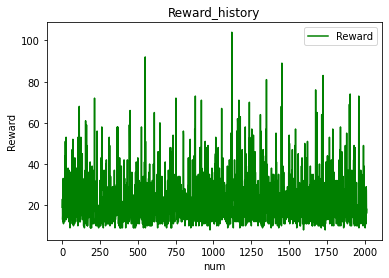

In [ ]:
i=0
state=env.reset()
epsilon=max_epsilon
#for i in range (0,num_iteration):
while (1): 

  if epsilon > np.random.rand(1)[0]:
    action =np.random.choice(2)

  else:
    #///////////////////////////////////////////PLAY SAVE IT IN BUFFER 
    #obtain Q value from online model 
    state_tensor = tf.convert_to_tensor(state)
    state_tensor = tf.expand_dims(state_tensor, 0)
    action_probs = online_model(state_tensor, training=False)
    action = tf.argmax(action_probs[0]).numpy()
  #take action and store it to replay buffer 
  state_next, reward, done, _ = env.step(action)
  state_buffer.append(state)
  next_state_buffer.append(next_state)
  done_buffer.append(done)
  reward_buffer.append(reward)
  actions_buffer.append(action)
  state=next_state
  current_reward=current_reward+reward
  #print(state)
  if done:
    #print("done")
    state=env.reset()
    reward_history.append(current_reward)
    current_reward=0
    
  #/////////////////////////////////////////////////////////////////
  #//////////////////////////////////// train every 4 
  if i%update_after_actions==0 :
    #take batch size number of samples
    indices = np.random.choice(range(len(done_buffer)), size=mini_batch_size)
    #train on them 
     # Using list comprehension to sample from replay buffer
    state_sample = np.array([state_buffer[i] for i in indices])
    state_next_sample = np.array([next_state_buffer[i] for i in indices])
    rewards_sample = [reward_buffer[i] for i in indices]
    action_sample = [actions_buffer[i] for i in indices]
    done_sample = tf.convert_to_tensor([float(done_buffer[i]) for i in indices])
    #use target model to predict Q value of future 
    future_q_value=target_model.predict(state_next_sample)
    # selecting maximum of future q value 
    future_reward=tf.reduce_max(future_q_value, axis=1)
    actual_q_values = rewards_sample + discount_factor * future_reward
    # Create a mask so we only calculate loss of prediction . only for q value which corresponds to our action   
    masks = tf.one_hot(action_sample, num_actions)
    #calculate models preicted q values 
    with tf.GradientTape() as tape:
      q_values =online_model(state_sample)
      # Apply the masks to the Q-values to get the Q-value for action taken
      q_action = tf.reduce_sum(tf.multiply(q_values, masks), axis=1)
      # Calculate loss between new Q-value and old Q-value
      loss = loss_function(actual_q_values, q_action)
      loss_of_q_hist.append(loss)
    # Backpropagation
    grads = tape.gradient(loss, online_model.trainable_variables)
    optimizer.apply_gradients(zip(grads, online_model.trainable_variables))
  #/////////////////////////////// Update target model 
  if i % target_network_update_freqency == 0:
    # update the the target network with new weights
    target_model.set_weights(online_model.get_weights())
  #///////////////////////////////////////////////////
  if len(actions_buffer) >max_reply_buffer_size:
    del reward_buffer[:1]
    del state_buffer[:1]
    del next_state_buffer[:1]
    del actions_buffer[:1]
    del done_buffer[:1]
  #///////////////////////////////////////////////////
  if done :
    i=i+1
    output.clear()
    num_runs=[x for x in range (1,len(reward_history)+1)]
    plt.plot(num_runs,reward_history, 'g', label='Reward')
    #g=green b=blue 
    #plt.plot(epochs, loss_val, 'b', label='validation loss')
    plt.title('Reward_history')
    plt.xlabel('num')
    plt.ylabel('Reward')
    plt.legend()
    plt.show()



  if i==1000000:
    break
  if i%2500==0:
    with open("reward_history"+str(i)+".txt", "wb") as fp:
      pickle.dump(reward_history, fp)
    with open("loss_q_hist"+str(i)+".txt", "wb") as fp:
      pickle.dump(loss_of_q_hist, fp)
  if i%100==0:
    epsilon=epsilon-((max_epsilon-min_epsilon)/10000)
    epsilon=max(epsilon,min_epsilon) 

  #print(rewards_sample)